In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

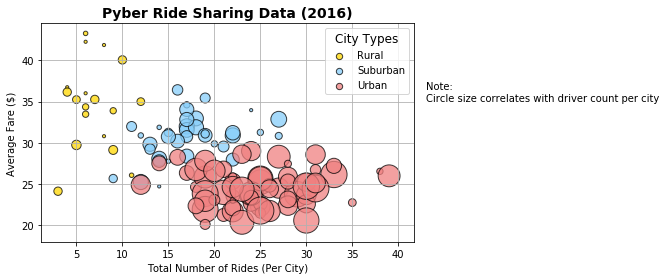

In [6]:
# Obtain the x and y coordinates for each of the three city types
city_group = combined_data.groupby(["type", "city"])

rural_data_count = city_group.count().loc["Rural"]
rural_data_mean = city_group.mean().loc["Rural"]
rural_x = rural_data_count["ride_id"]
rural_y = rural_data_mean["fare"]

suburban_data_count = city_group.count().loc["Suburban"]
suburban_data_mean = city_group.mean().loc["Suburban"]
suburban_x = suburban_data_count["ride_id"]
suburban_y = suburban_data_mean["fare"]

urban_data_count = city_group.count().loc["Urban"]
urban_data_mean = city_group.mean().loc["Urban"]
urban_x = urban_data_count["ride_id"]
urban_y = urban_data_mean["fare"]

# Build the scatter plots for each city types
plt.scatter(rural_x, rural_y, marker="o", alpha=0.75, label="Rural",
            facecolors="gold", edgecolors="black", s=rural_data_mean["driver_count"]*10)
plt.scatter(suburban_x, suburban_y, marker="o", alpha=0.75, label="Suburban",
            facecolors="lightskyblue", edgecolors="black", s=suburban_data_mean["driver_count"]*10)
plt.scatter(urban_x, urban_y, marker="o", alpha=0.75, label="Urban",
            facecolors="lightcoral", edgecolors="black", s=urban_data_mean["driver_count"]*10)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)", fontsize=14, fontweight="bold")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.tight_layout()

# Create a legend
legend = plt.legend(title="City Types", fontsize=10)
legend.get_title().set_fontsize(12)
for handle in legend.legendHandles:
    handle.set_sizes([40])

# Incorporate a text label regarding circle size
plt.text(43, 36.5, "Note:")
plt.text(43, 35, "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Pyber_Ride_Sharing_Data_2016.png", bbox_inches="tight")

## Total Fares by City Type

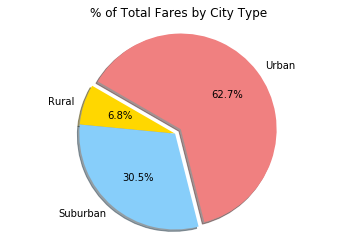

In [7]:
# Build Pie Chart
type_group_sum = combined_data.groupby(["type"]).sum()
total_fares = type_group_sum["fare"]
total_fares_pie = total_fares.plot(kind="pie",
                                   colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
                                   startangle=150, explode=(0, 0, 0.075), shadow=True,
                                   title=("% of Total Fares by City Type"))
plt.axis("equal")
plt.ylabel("")

# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

## Total Rides by City Type

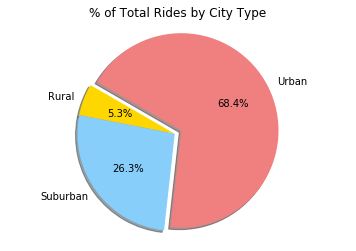

In [8]:
# Build Pie Chart
type_group_count = combined_data.groupby(["type"]).count()
total_rides = type_group_count["ride_id"]
total_rides_pie = total_rides.plot(kind="pie",
                                   colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
                                   startangle=150, explode=(0, 0, 0.075), shadow=True,
                                   title=("% of Total Rides by City Type"))
plt.axis("equal")
plt.ylabel("")

# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

## Total Drivers by City Type

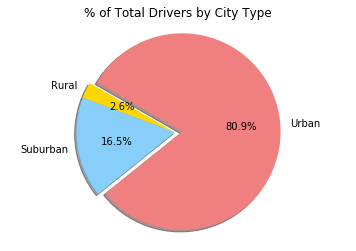

In [9]:
# Build Pie Charts
total_drivers_sum = city_data.groupby(["type"]).sum()
total_drivers_sum
total_drivers_pie = total_drivers_sum.plot(kind="pie", y="driver_count", legend=None,
                                   colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
                                   startangle=150, explode=(0, 0, 0.075), shadow=True,
                                   title=("% of Total Drivers by City Type"))
plt.axis("equal")
plt.ylabel("")

# Save Figure
plt.savefig("Total_Drivers_by_City_Type.png")